In [167]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, mean_squared_error, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

# sklearn models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [168]:
path = os.getcwd() + '\\Structured_data.csv'
data = pd.read_csv(path, header=0)
data.head()

# Create dataframe using relevant colums
# x = data[["Datetime","Open_BTC","High_BTC","Low_BTC","Close_BTC","Volume_BTC","Dividends_BTC","Stock Splits_BTC",
#           "Open_diff_BTC","High_diff_BTC","Close_diff_BTC","Volume_diff_BTC","Open_VET","High_VET","Low_VET","Close_VET",
#           "Volume_VET","Dividends_VET","Stock Splits_VET","Open_diff_VET","High_diff_VET","Close_diff_VET","Volume_diff_VET"]]

# Create targets using next timestep
# y_VET = []
# for i in range(0, len(data.index) - 1):
#     y_VET.append(x.iloc[i + 1]["Close_VET"])

# Assign it to np array
# y_VET = np.array([y_VET])

# Remove last row since we can't have target for last row
# x = x[:-1]

df = data.iloc[:, :-2]
df.head()

y_Reg_VET = data.iloc[:, -2:-1].values.ravel()
y_Reg_VET.shape

y_Class_VET = data.iloc[:, -1:].values.ravel()
y_Class_VET.shape

(1144,)

In [169]:
# Transforms datetime into incremental values
# le = LabelEncoder()
# x["Datetime"] = le.fit_transform(x["Datetime"])

# Consider removing datetime from data
# x.drop(["Datetime"], inplace=True, axis=1)

print(y_Class_VET)
df.head()


[ 0.16538357  0.15046041  0.14293372 ... -0.23317506 -0.14386927
 -0.14837404]


,Target-20_Open_VET,Target-20_High_VET,Target-20_Low_VET,Target-20_Close_VET,Target-20_Volume_VET,Target-20_Open_BTC,Target-20_High_BTC,Target-20_Low_BTC,Target-20_Close_BTC,Target-20_Volume_BTC,...,Target-1_Open_Difference_From_Upper_Bollinger_Band,Target-1_High_Difference_From_Upper_Bollinger_Band,Target-1_Low_Difference_From_Upper_Bollinger_Band,Target-1_Close_Difference_From_Upper_Bollinger_Band,Target-1_Open_Difference_From_Lower_Bollinger_Band,Target-1_High_Difference_From_Lower_Bollinger_Band,Target-1_Low_Difference_From_Lower_Bollinger_Band,Target-1_Close_Difference_From_Lower_Bollinger_Band,Target-1_Open_Difference_From_SMA20,Target-1_High_Difference_From_SMA20
0,1.0,1.000000,0.948314,0.985892,19980000,6551.520020,6719.959961,6498.640137,6719.959961,4097820000,...,1.328652,0.392822,0.545844,0.403403,0.852612,-0.083217,0.069804,-0.072636,1.090632,0.154802
1,1.0,1.081295,0.978835,1.059167,24453700,6719.950195,6789.629883,6700.959961,6763.189941,3312600000,...,1.347528,0.374763,0.449117,0.395172,0.858104,-0.114661,-0.040307,-0.094252,1.102816,0.130051
2,1.0,1.003639,0.943015,0.989799,20503900,6754.640137,6774.750000,6620.750000,6707.259766,3295500000,...,1.276142,0.357287,0.410828,0.381979,0.798052,-0.120802,-0.067261,-0.096111,1.037097,0.118242
3,1.0,1.173039,0.999212,1.170937,53968100,6710.799805,6884.640137,6689.709961,6884.640137,4019000000,...,1.292002,0.346231,0.402400,0.368173,0.799363,-0.146408,-0.090240,-0.124466,1.045683,0.099911
4,1.0,1.051404,0.983744,1.007904,45607800,6891.080078,7109.560059,6882.339844,7096.279785,4659940000,...,1.089974,0.300664,0.329477,0.309913,0.669390,-0.119920,-0.091106,-0.110670,0.879682,0.090372


In [172]:
X_train, X_test, y_train, y_test = train_test_split(df, y_Class_VET, test_size=0.20, random_state=0, shuffle=False)

## Logistic Regression

In [173]:
# Logistic Regression 
lg = LogisticRegression(random_state=0, max_iter=1000000)

# Fit with training data
lg.fit(X_train,y_train)
predicted = lg.predict(X_test)

ValueError: Unknown label type: 'continuous'

              precision    recall  f1-score   support

         0.0       0.47      0.46      0.46       102
         1.0       0.57      0.57      0.57       127

    accuracy                           0.52       229
   macro avg       0.52      0.52      0.52       229
weighted avg       0.52      0.52      0.52       229



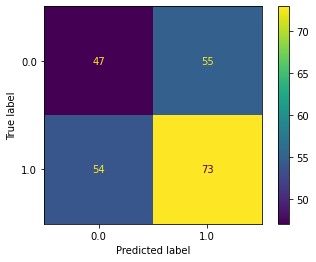

In [165]:
# Confusion matrix to check predicted
print(classification_report(y_test, predicted))

plot_confusion_matrix(lg, X_test, y_test)  
plt.show()


Text(0, 0.5, 'Precision')

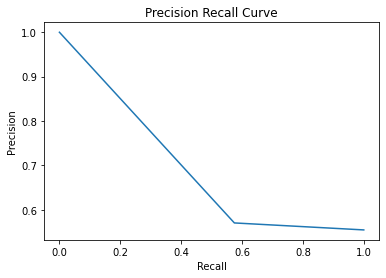

In [161]:
# Precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

## Polynomial Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y_Reg_VET, test_size=0.20, random_state=0, shuffle=False)

In [156]:
# WIP Polynomial Regression as another way to model our data
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df)
X_test_poly = poly.fit_transform(X_test)

lg = LinearRegression()

# Fit
lg.fit(X_poly, y_Reg_VET)

# Obtain coefficients
# print(lg.coef_)

# Predict
predictions_poly = lg.predict(X_test_poly)
# print(predictions_poly)

lg.score(X_poly, y_Reg_VET)

# RMSE Root-mean-square deviation
print(np.sqrt(mean_squared_error(y_test, predictions_poly)))

5.487424509530664e-09


Index(['Target-20_Open_VET', 'Target-20_High_VET', 'Target-20_Low_VET',
       'Target-20_Close_VET', 'Target-20_Volume_VET', 'Target-20_Open_BTC',
       'Target-20_High_BTC', 'Target-20_Low_BTC', 'Target-20_Close_BTC',
       'Target-20_Volume_BTC',
       ...
       'Target-1_Close_VET', 'Target-1_Volume_VET', 'Target-1_Open_BTC',
       'Target-1_High_BTC', 'Target-1_Low_BTC', 'Target-1_Close_BTC',
       'Target-1_Volume_BTC', 'Target-1_SMA20',
       'Target-1_Upper_Bollinger_Band', 'Target-1_Lower_Bollinger_Band'],
      dtype='object', length=260)


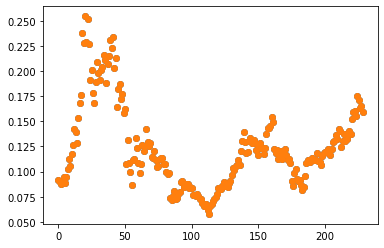

In [166]:
print(y_Reg_VET[:229])

# print(y_Reg_VET[:229].shape)
# print(predictions_poly.shape)
# plt.scatter(y_Reg_VET[:229], predictions_poly)

plt.scatter(np.arange(229), predictions_poly)

plt.scatter(np.arange(229), y_Reg_VET[-229:])


# residuals = np.subtract(predictions_poly, y_Reg_VET[-229:])

# perc = np.zeros(len(residuals))
# for i in range(0, len(residuals)):
#     print(residuals[i])
#     print(y_Reg_VET[-(229 - i)])
#     perc[i] = (residuals[i] / y_Reg_VET[-(229 - i)]) * 100

# print(perc)
    
# print(y_Reg_VET[-229:].shape)


# plt.scatter(X_test["Close_VET"], predictions_poly)